# Trabalho Computacional II - Sistemas de Comunicações Digitais 2024.2

# Aluno: João Vitor de Oliveira Fraga

# Matrícula: 537377

Obs: As funções utilizadas nesse notebook estão no arquivo "DigitalCommunications.py", que está na pasta enviada


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DigitalCommunications import *



# Questão 1

### Item a)

Dado que a energia média é dada por:

\begin{equation}
    E_m = \frac{1}{M}\sum |A_k|^2, \forall A_k \in \{A_0, A_1, A_2, ..., A_{M-1}\}
\end{equation}

Como temos quatro simbolos com módulo ao quadrado igual a $r_1$ e quatro símbolos com módulo ao quadrado igual a $r_2$, ficamos com:

\begin{equation}
    \frac{1}{8}\left( 4r_1^2 + 4r_2^2   \right) = \frac{r_1^2}{2} + \frac{r_1^2}{2}
\end{equation}

Indo agora para o código:

In [2]:
import sympy as sp

# Definindo r1 e r2 como variaveis simbolicas
r1 = sp.symbols('r1') 
r2 = sp.symbols('r2')

num_r1 = 4 # Número de simbolos com magnitude igual a r_1
num_r2 = 4 # Número de simbolos com magnitude igual a r_2

# Cálculo da energia média
Em = (num_r1 * r1**2 + num_r2 * r2**2)/8

# Mostrando o resultado
print("Energia média (Em) simbólica:")
sp.pprint(Em)

Energia média (Em) simbólica:
  2     2
r₁    r₂ 
─── + ───
 2     2 


Não consegui determinar a fórmula exata para o item (b), mas se considerarmos a fórmula padrão para a probabilidade de erro por simbolo para M-QAM, temos:

$P_e = 4 \left( 1 - \frac{1}{\sqrt{M}} \right) Q\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{M-1}} \right) - 4 \left( 1 - \frac{1}{\sqrt{M}} \right)^2 Q^2\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{M-1}} \right)
$, onde $\frac{E}{N_0} = SNR$

Portanto:

$P_e = 4 \left( 1 - \frac{1}{\sqrt{8}} \right) Q\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{7}} \right) - 4 \left( 1 - \frac{1}{\sqrt{8}} \right)^2 Q^2\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{7}} \right)
$.

### Item c)

Considerando os valores $r_1 = 1$ e $r_2 = \sqrt{2}$, nosso alfabeto terá as seguintes posições: 

$A = \left\{ (\frac{\sqrt{2}}{2} + j\frac{\sqrt{2}}{2}), (-\frac{\sqrt{2}}{2} + j\frac{\sqrt{2}}{2}), (-\frac{\sqrt{2}}{2} - j\frac{\sqrt{2}}{2}), (\frac{\sqrt{2}}{2} - j\frac{\sqrt{2}}{2}), (\sqrt{2} + j0), (0 + j\sqrt{2}), (-\sqrt{2} + j0), (0 - j\sqrt{2}) \right\}$

In [3]:
# Definindo um vetor com os valores dos simbolos
constellation_values = np.array([
    (np.sqrt(2)/2 + 1j*np.sqrt(2)/2),
    (-np.sqrt(2)/2 + 1j*np.sqrt(2)/2),
    (-np.sqrt(2)/2 - 1j*np.sqrt(2)/2),
    (np.sqrt(2)/2 - 1j*np.sqrt(2)/2),
    (np.sqrt(2) + 0j),
    (0 + 1j*np.sqrt(2)),
    (-np.sqrt(2) + 0j),
    (0 - 1j*np.sqrt(2))
])

M = 8 # Número de símbolos na constelação
snr_range = np.arange(0, 22, 2) # Range de SNR em dB

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, 264000)

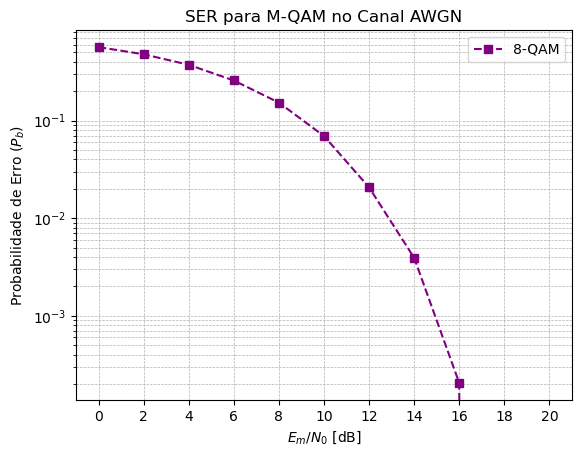

In [4]:

# Geração de símbolos a partir dos bits
n_bits_per_symbol = int(np.log2(M))
num_symbols = len(bits) // n_bits_per_symbol
symbols_index = np.random.randint(0, len(constellation_values), num_symbols)  # Simulando mapeamento aleatório
modulated_symbols = constellation_values[symbols_index]  # Obtendo a sequência modulada

error_prob_prat_qam = [] 


SER_QAM, BER_QAM, symbols_rx = getSERandBER_defined(bits, M, snr_range, modulated_symbols)
error_prob_prat_qam.append(SER_QAM)

plt.figure()
plt.semilogy(snr_range, error_prob_prat_qam[0], '--s', label=f'{M}-QAM', color='purple')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('SER para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

### Item d)

Para $r_1 = r_2 = 1$ nós temos uma constelação 8-PSK, e sabemos que a fórmula é dada por:

$P_e \approx 2 Q \left(\sqrt{\frac{2E}{N_0}}sen(\frac{\pi}{M})\right)$, onde $\frac{E}{N_0} = SNR$

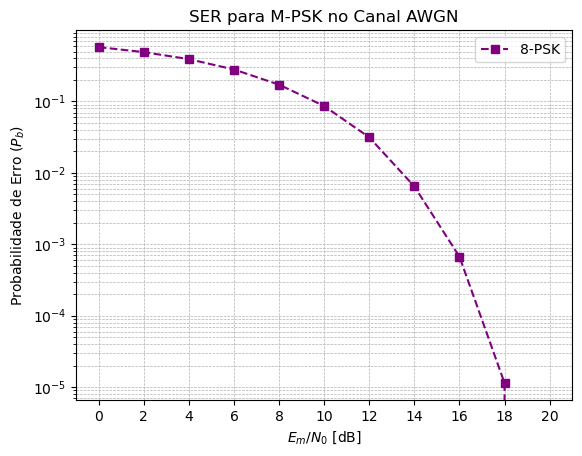

In [5]:
error_prob_prat_psk = [] 


SER_psk, BER_psk = getSERandBER(bits, M, snr_range, 'psk')
error_prob_prat_psk.append(SER_psk)

plt.figure()
plt.semilogy(snr_range, error_prob_prat_psk[0], '--s', label=f'{M}-PSK', color='purple')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('SER para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

# Questão 2

## Item a)

### Detector MAP no Canal AWGN

O desenvolvimento da fórmula é mostrado na imagem a seguir:

![Desenvolvimento MAP](desenvolvimentoMAP.png)

Temos então os seguintes simbolos $X = \{s_0 = -3, s_1 = -1, s_2 = 1, s_3 = 3 \}$, onde $P(X=-3) = P(X=1) = 0.2$ e $P(X=-1) = P(X=3) = 0.3$, e as regiões de decisões são entre:

Menor que $s_0$;

$s_0$ e $s_1$;

$s_1$ e $s_2$;

$s_2$ e $s_3$;

Maior que $s_3$



In [6]:
# Dados do problema
X = [-3, -1, 1, 3]
probs = [0.2, 0.3, 0.2, 0.3]
var = 0.25  # Variância σ²

# Recalculando as regiões de decisão
s0_s1 = map_region(X[0], X[1], probs[0], probs[1], var)
s1_s2 = map_region(X[1], X[2], probs[1], probs[2], var)
s2_s3 = map_region(X[2], X[3], probs[2], probs[3], var)

# Exibindo as regiões de decisão conforme solicitado
print(f"s0: y < {s0_s1:.2f}")
print(f"s1: {s0_s1:.2f} < y < {s1_s2:.2f}")
print(f"s2: {s1_s2:.2f} < y < {s2_s3:.2f}")
print(f"s3: y > {s2_s3:.2f}")

s0: y < -2.05
s1: -2.05 < y < 0.05
s2: 0.05 < y < 1.95
s3: y > 1.95


## Item b)

As regiões de decisão são:
- $s_0$ se $y<-2.05$
- $s_1$ se $-2.05\leq y<0.05$
- $s_2$ se $0.05\leq y<1.95$
- $s_3$ se $y\geq 1.95$

Portanto se $y=-2$, nosso decisor MAP irá definir que o simbolo detectado é $s_1$

# Questão 3

Temos que o detector ML é um detector MAP onde os símbolos são equiprovavéis, podemos escrever sua equação como:

$\hat{x} = \arg\min_{x_i} \, |y - x_i|^2$

Onde esse detector escolhe o simbolo que minima a distância euclidiana entre o símbolo transmitido ($x_i$) e o simbolo recebido $y$, como se fosse um slicer visto na parte anterior da disciplina, definindo então os parâmetros impostos e fazendo o que se pede:

In [7]:
constellation_values_qam = np.array([1+1j, -1+1j, -1-1j, 1-1j])

M_qam = 4 # Número de símbolos na constelação
snr_range_qam = np.arange(-20, 11, 5) # Range de SNR em dB

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, 264000)

In [8]:
SER, BER = getSERandBER(bits, M_qam, snr_range_qam, modulation_type='QAM') # Obtendo SER e BER práticas
Pb = TheoricalErrorProbMQAM(M_qam, snr_range_qam) # Obtendo SER teórica


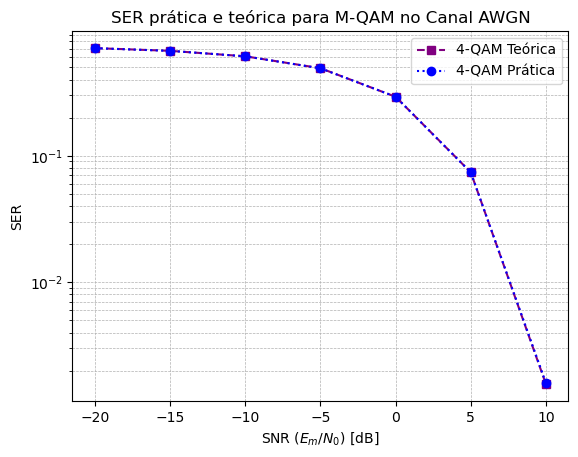

In [9]:
plt.figure()
plt.semilogy(snr_range_qam, Pb, '--s', label=f'{M_qam}-QAM Teórica', color='purple')
plt.semilogy(snr_range_qam, SER, ':o', label=f'{M_qam}-QAM Prática', color='blue')

# Configurações do gráfico
plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER prática e teórica para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range_qam)
plt.show()  

Podemos então inferir que o detector ML tem uma probabilidade de erro prática quase que igual a probabilidade de erro teórica.

# Questão 4

Devido ao fato de que estou usando o Python para a realização do trabalho computacional, a função que faz a modulação QPSK será uma desenvolvida por mim denominada "getPSK", onde no argumento que eu indico a ordem irei colocar $4$, já que uma modulação QPSK é uma 4-PSK.

Além do mais, fiz uma nova função denominada "getSERandBER_without_awgn", pois a minha função antiga para calcular o BER adicionava o sinal num canal AWGN diretamente, o que não é feito em todos os casos.

Além disso, não irei fazer a função de down-converter, pois como o arquivo não foi disponibilizado, e nós já estamos trabalhando em banda base, não é necessário a realização dessa função.

## ITEM 1: Sistema Ideal (Sem Ruído, Sem Desvio de Fase)


In [10]:
# Parâmetros da simulação
M_order_psk = 4  # Modulação QPSK (4-PSK)
snr_psk = np.arange(0, 21, 2)  # Faixa de SNR de 0 a 20 dB
phase_offset = np.pi / 4  # Desvio de fase de pi/4

# Gerando bits aleatórios
bits = np.random.randint(0, 2, 100000)

# Modulando em QPSK
symbols, gray_labels = getPSK(bits, M_order_psk)
constellation = np.unique(symbols)
signal_energy = getEnergy(symbols)

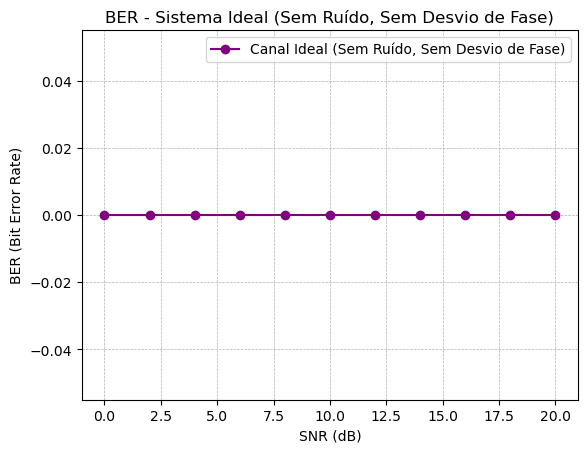

In [11]:
# ITEM 1: Sistema Ideal (Sem Ruído, Sem Desvio de Fase)

# Calculando a SER e BER para o canal ideal
SER_ideal, BER_ideal, symbols_rx_ideal = getSERandBER_without_awgn(
    bits, 
    M_order_psk, 
    snr_psk, 
    constellation  # Usando a constelação como entrada direta
)

# Plotando a curva de BER para o sistema ideal
plt.figure()
plt.plot(snr_psk, BER_ideal, 'o-', label='Canal Ideal (Sem Ruído, Sem Desvio de Fase)', color='purple')
plt.title('BER - Sistema Ideal (Sem Ruído, Sem Desvio de Fase)')
plt.xlabel('SNR (dB)')
plt.ylabel('BER (Bit Error Rate)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

O fato da sua curva ser 0 se deve ao fato de que todos os símbolos recebidos por estarem sobrepostos aos símbolos transmitidos, portanto seu erro é zero, e não muda com o aumento da SNR.

## ITEM 2: Sistema com Ruído AWGN


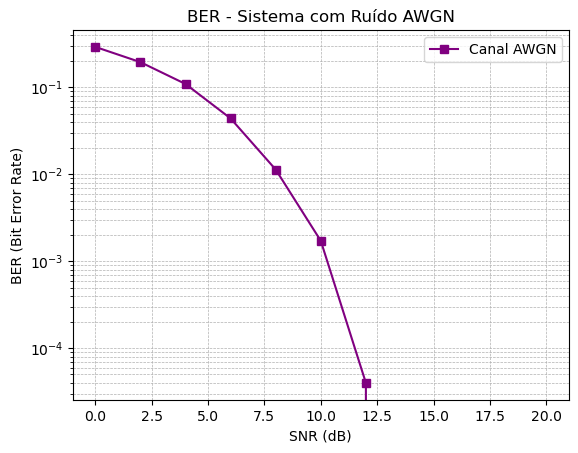

In [12]:
# Calculando SER e BER usando a função que já adiciona o ruído AWGN internamente
SER_awgn, BER_awgn = getSERandBER(
    bits, 
    M_order_psk, 
    snr_psk, 
    'PSK'  # Especificando o tipo de modulação (PSK, no caso do QPSK)
)

# Plotando a curva de BER para o sistema com ruído AWGN
plt.figure()
plt.plot(snr_psk, BER_awgn, 's-', label='Canal AWGN', color='purple')
plt.title('BER - Sistema com Ruído AWGN')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('BER (Bit Error Rate)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Nesse caso como adicionamos um canal AWGN, quanto maior for a SNR menor será meu erro, pois o ruído será menor e o meu símbolo recebido estará mais próximo do meu símbolo transmitido.

## ITEM 3: Sistema com Ruído AWGN + Desvio de Fase

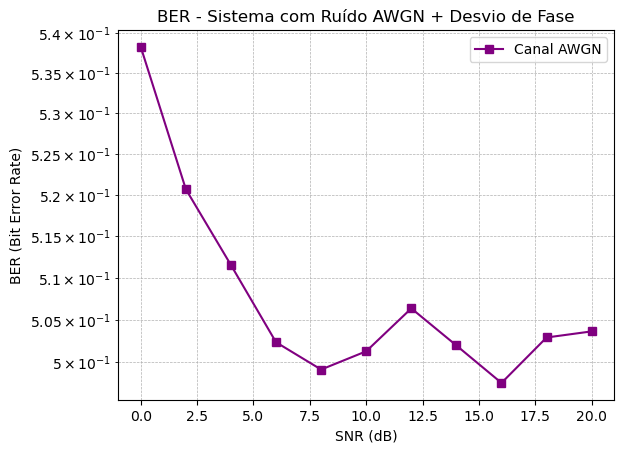

In [13]:
# Calculando SER e BER usando a função que já adiciona o ruído AWGN e o desvio de fase internamente
SER_awgn_phase, BER_awgn_phase = getSERandBER_withphase(
    bits, 
    M_order_psk, 
    snr_psk, 
    'PSK', phase_offset  # Especificando o tipo de modulação (PSK, no caso do QPSK)
)

# Plotando a curva de BER para o sistema com ruído AWGN
plt.figure()
plt.plot(snr_psk, BER_awgn_phase, 's-', label='Canal AWGN', color='purple')
plt.title('BER - Sistema com Ruído AWGN + Desvio de Fase')
plt.xlabel('SNR (dB)')
plt.ylabel('BER (Bit Error Rate)')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


Já para o item 3, essa variação aleatória ocorre pois além da adição do ruído, é combinado um desvio de fase em $\frac{\pi}{4}$, aumentando assim o erro.

## ITEM 4: Sistema com Ruído AWGN + Desvio de Fase + Correção de Fase


A equação usada para estimar a fase é dada por:

$
\hat{\varphi} = \sum_{k=1}^{N} w_k \cdot \arg\left( r_k \cdot s_k^* \right)
$

Onde:
- $r_k$ representa os **símbolos recebidos**.
- $s_k^*$ é o **símbolo da constelação conjugado** (representando o símbolo transmitido ideal).
- $w_k$ é um **peso exponencial** atribuído ao símbolo recebido, dado por:

$
w_k = e^{-\left| \arg(r_k) - \arg(s_k) \right|}
$

- $N$ é o número total de símbolos transmitidos.
- $\arg(\cdot)$ retorna a **fase** do número complexo resultante.

Essa equação **calcula uma média ponderada das diferenças de fase**, onde símbolos mais próximos da constelação têm maior influência na estimativa final.

---

## 🔄 **Correção de Fase**
Após estimar o desvio de fase **\(\hat{\varphi}\)**, aplicamos a seguinte correção a cada símbolo recebido:

$
r_k^{\text{corrigido}} = r_k \cdot e^{-j\hat{\varphi}}
$

Essa operação **remove a defasagem do canal**, garantindo que os símbolos fiquem corretamente alinhados com a constelação original.

A função que calcula e aplica essa correção de fase é denominada **`phase_correction`**.



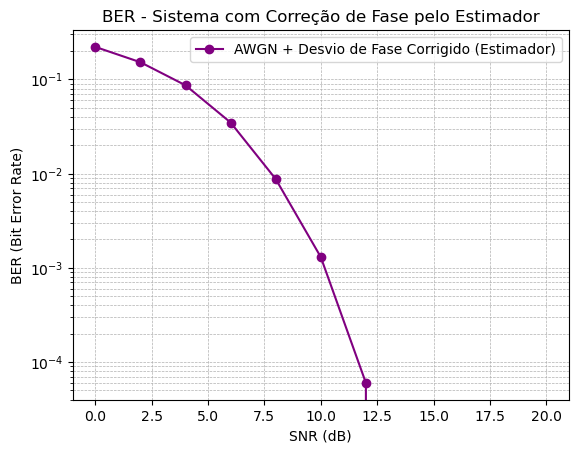

In [14]:
# ITEM 4: Correção de Fase usando o Estimador de Fase

# Calculando SER e BER com o estimador de fase
SER_corrected, BER_corrected = getSERandBER_withphase_estimation(
    bits, 
    M_order_psk, 
    snr_psk, 
    'PSK', 
    phase_offset  # Aplicando desvio de fase π/4
)

# Plotando a curva de BER com correção de fase
plt.figure()
plt.plot(snr_psk, BER_corrected, 'o-', label='AWGN + Desvio de Fase Corrigido (Estimador)', color='purple')
plt.title('BER - Sistema com Correção de Fase pelo Estimador')
plt.xlabel('SNR (dB)')
plt.ylabel('BER (Bit Error Rate)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.legend()
plt.show()


Conseguimos perceber que o detector de fase conseguiu eliminar o desvio de fase e obteve a mesma curva que foi obtida quando tinha apenas o ruído, o que é o esperado.

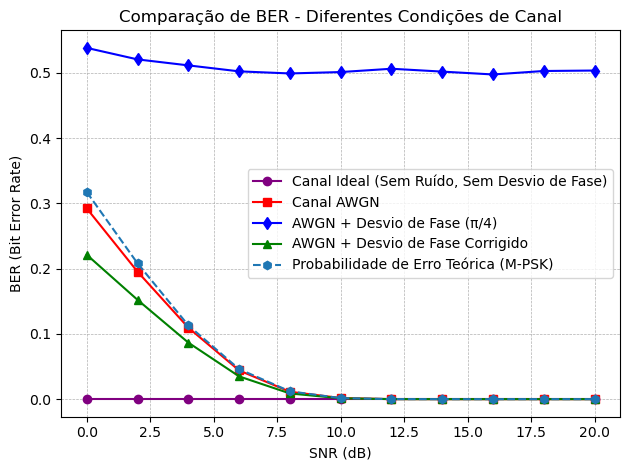

In [15]:
BER_theoretical = [TheoricalErrorProbMPSK(M_order_psk, snr) for snr in snr_psk] # Calculando a probabilidade de erro teórica para M-PSK
plt.figure()

plt.plot(snr_psk, BER_ideal, 'o-', color='purple', label='Canal Ideal (Sem Ruído, Sem Desvio de Fase)')
plt.plot(snr_psk, BER_awgn, 's-', color='red' ,label='Canal AWGN')
plt.plot(snr_psk, BER_awgn_phase, 'd-', color='blue',label='AWGN + Desvio de Fase (π/4)')
plt.plot(snr_psk, BER_corrected, '^-', color='green', label='AWGN + Desvio de Fase Corrigido')
plt.plot(snr_psk, BER_theoretical, 'h--',label='Probabilidade de Erro Teórica (M-PSK)')
plt.title('Comparação de BER - Diferentes Condições de Canal')
plt.xlabel('SNR (dB)')
plt.ylabel('BER (Bit Error Rate)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Exibindo o gráfico
plt.show()


Conseguimos então notar que o comportamento de todos os canais seguiram com o esperado, tanto que a curva da probabilidade de erro teórica e da prática para um canal AWGN estão quase que sobrepostas.

Além disso, podemos ver que o corretor do desvio de fase obteve uma menor probabilidade de erro que o do canal AWGN, isso ocorre pois como eu ajeito a fase do meu sinal recebido, essa correção é feita para além do desvio de $\frac{\pi}{4}$, corrigindo até a distorção causada pelo ruído.

# Questão 5

## Item 1:

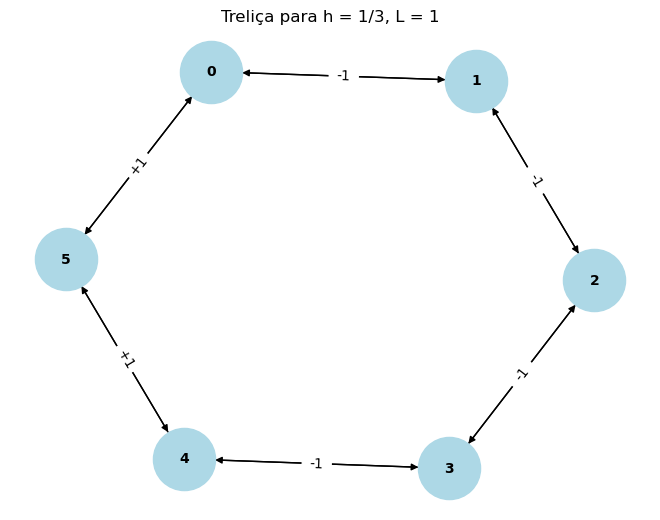

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Definindo os estados da fase
estados = [0, 1, 2, 3, 4, 5]  # Representando 0, pi/3, 2pi/3, pi, 4pi/3, 5pi/3

# Criando o grafo da treliça
G = nx.DiGraph()

# Adicionando transições
for estado in estados:
    # Transição para o próximo estado com símbolo +1
    proximo_estado = (estado + 1) % 6
    G.add_edge(estado, proximo_estado, symbol='+1')
    
    # Transição para o próximo estado com símbolo -1
    proximo_estado = (estado - 1) % 6
    G.add_edge(estado, proximo_estado, symbol='-1')

# Desenhando a treliça
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'symbol')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Treliça para h = 1/3, L = 1")
plt.show()

## Item 2:

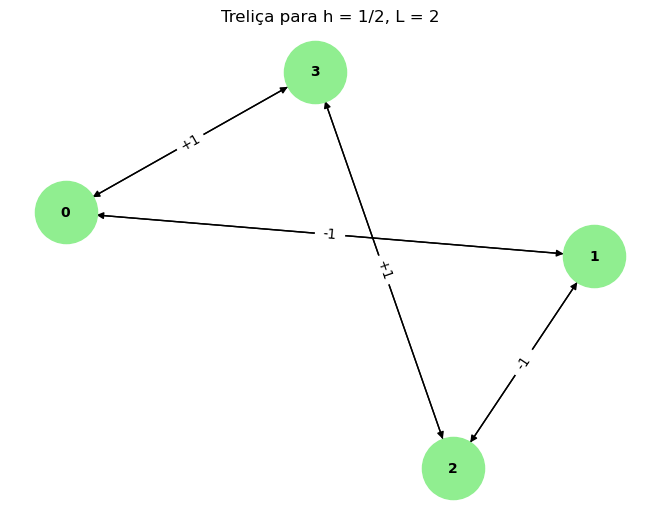

In [17]:
# Definindo os estados da fase
estados = [0, 1, 2, 3]  # Representando 0, pi/2, pi, 3pi/2

# Criando o grafo da treliça
G = nx.DiGraph()

# Adicionando transições
for estado in estados:
    # Transição para o próximo estado com símbolo +1
    proximo_estado = (estado + 1) % 4
    G.add_edge(estado, proximo_estado, symbol='+1')
    
    # Transição para o próximo estado com símbolo -1
    proximo_estado = (estado - 1) % 4
    G.add_edge(estado, proximo_estado, symbol='-1')

# Desenhando a treliça
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'symbol')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Treliça para h = 1/2, L = 2")
plt.show()

## Item 3

Se fosse adotado um pulso de frequência retangular de resposta completa ($L=1$) com $h=\frac{1}{2}$ a modulação correspondente seria o MSK (Minimum Shift Keying).

Característica distintiva: MSK: É um caso especial de CPM onde a fase muda linearmente em $\frac{\pi}{2}$ radianos por símbolo. A principal característica que a torna distinta é que ela minimiza a largura de banda do sinal modulado, mantendo a ortogonalidade entre os símbolos. Isso resulta em uma eficiência espectral superior comparada a outras modulações de fase contínua.

